In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
user=pd.read_csv('user_data.csv')
user.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436
1,user_3028,63,52,0,India,17,1498998165,405.677,339.450,intermediate,1441893325
2,user_2268,226,203,-8,Egypt,24,1505566052,307.339,284.404,beginner,1454267603
3,user_480,611,490,1,Ukraine,94,1505257499,525.803,471.330,advanced,1350720417
4,user_650,504,479,12,Russia,4,1496613433,548.739,486.525,advanced,1395560498


In [3]:
user.shape, user.isnull().sum()

((3571, 11),
 user_id                         0
 submission_count                0
 problem_solved                  0
 contribution                    0
 country                      1153
 follower_count                  0
 last_online_time_seconds        0
 max_rating                      0
 rating                          0
 rank                            0
 registration_time_seconds       0
 dtype: int64)

In [4]:
train=pd.read_csv('train_submissions.csv')
train.head()

,user_id,problem_id,attempts_range
0,user_232,prob_6507,1
1,user_3568,prob_2994,3
2,user_1600,prob_5071,1
3,user_2256,prob_703,1
4,user_2321,prob_356,1


In [5]:
train.shape, train.isnull().sum()

((155295, 3),
 user_id           0
 problem_id        0
 attempts_range    0
 dtype: int64)

In [6]:
new_df=user.merge(train, how='left')
new_df.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,attempts_range
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_75,1.0
1,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_1481,1.0
2,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_3474,1.0
3,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_334,1.0
4,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_3508,1.0


In [7]:
new_df["ID"] = new_df['user_id']+"_"+ new_df["problem_id"]
new_df.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,attempts_range,ID
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_75,1.0,user_3311_prob_75
1,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_1481,1.0,user_3311_prob_1481
2,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_3474,1.0,user_3311_prob_3474
3,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_334,1.0,user_3311_prob_334
4,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_3508,1.0,user_3311_prob_3508


In [8]:
new_df.shape

(155337, 14)

In [9]:
new_df.shape, new_df.isnull().sum()

((155337, 14),
 user_id                          0
 submission_count                 0
 problem_solved                   0
 contribution                     0
 country                      37891
 follower_count                   0
 last_online_time_seconds         0
 max_rating                       0
 rating                           0
 rank                             0
 registration_time_seconds        0
 problem_id                      42
 attempts_range                  42
 ID                              42
 dtype: int64)

In [10]:
problem=pd.read_csv('problem_data.csv')
problem.head(), problem.shape

(  problem_id level_type  points                                 tags
 0  prob_3649          H     NaN                                  NaN
 1  prob_6191          A     NaN                                  NaN
 2  prob_2020          F     NaN                                  NaN
 3   prob_313          A   500.0                greedy,implementation
 4   prob_101          A   500.0  constructive algorithms,greedy,math,
 (6544, 4))

In [11]:
df=new_df.merge(problem, how='left')
df.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,attempts_range,ID,level_type,points,tags
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_75,1.0,user_3311_prob_75,A,500.0,implementation
1,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_1481,1.0,user_3311_prob_1481,B,1000.0,"brute force,implementation"
2,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_3474,1.0,user_3311_prob_3474,B,1000.0,"constructive algorithms,implementation,sortings"
3,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_334,1.0,user_3311_prob_334,A,500.0,"binary search,brute force,implementation,math"
4,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_3508,1.0,user_3311_prob_3508,A,500.0,implementation


In [12]:
df.shape, df.isnull().sum()

((155337, 17),
 user_id                          0
 submission_count                 0
 problem_solved                   0
 contribution                     0
 country                      37891
 follower_count                   0
 last_online_time_seconds         0
 max_rating                       0
 rating                           0
 rank                             0
 registration_time_seconds        0
 problem_id                      42
 attempts_range                  42
 ID                              42
 level_type                     662
 points                       29117
 tags                         15469
 dtype: int64)

In [13]:
df.select_dtypes(include='object').dtypes

user_id       object
country       object
rank          object
problem_id    object
ID            object
level_type    object
tags          object
dtype: object

In [14]:
df['attempts_range'].unique().size

7

In [15]:
null=['country','problem_id', 'level_type', 'tags']

In [16]:
def null_object(df, group):
    size=len(group)
    for j,i in enumerate(group):
        mode=df[i].mode()
        print(f'{i} Mode: {mode}')
        df[i]=df[i].fillna(df[i].mode()[0])
        print("*********************************************************")
        print("")
    print(df.isnull().sum())

In [17]:
null_object(df, null)

country Mode: 0    India
Name: country, dtype: object
*********************************************************

problem_id Mode: 0    prob_5071
Name: problem_id, dtype: object
*********************************************************

level_type Mode: 0    A
Name: level_type, dtype: object
*********************************************************

tags Mode: 0    implementation
Name: tags, dtype: object
*********************************************************

user_id                          0
submission_count                 0
problem_solved                   0
contribution                     0
country                          0
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
problem_id                       0
attempts_range                  42
ID                              42
level_type                       0
points  

In [18]:
intt=['attempts_range', 'points']

In [19]:
df['attempts_range'].mean(), df['attempts_range'].median()

(1.7550275282526804, 1.0)

In [20]:
df['points'].mean(), df['points'].median()

(993.3023688797338, 1000.0)

In [21]:
def null_int(df, group):
    size=len(group)
    for j,i in enumerate(group):
        median=df[i].median()
        print(f'{i} median: {median}')
        df[i]=df[i].fillna(df[i].median())
        print("")
    print(df.isnull().sum())
    

In [22]:
null_int(df, intt)

attempts_range median: 1.0

points median: 1000.0

user_id                       0
submission_count              0
problem_solved                0
contribution                  0
country                       0
follower_count                0
last_online_time_seconds      0
max_rating                    0
rating                        0
rank                          0
registration_time_seconds     0
problem_id                    0
attempts_range                0
ID                           42
level_type                    0
points                        0
tags                          0
dtype: int64


In [23]:
df.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,attempts_range,ID,level_type,points,tags
0,user_3311,47,40,0,India,4,1504111645,348.337,330.849,intermediate,1466686436,prob_75,1.0,user_3311_prob_75,A,500.0,implementation
1,user_3311,47,40,0,India,4,1504111645,348.337,330.849,intermediate,1466686436,prob_1481,1.0,user_3311_prob_1481,B,1000.0,"brute force,implementation"
2,user_3311,47,40,0,India,4,1504111645,348.337,330.849,intermediate,1466686436,prob_3474,1.0,user_3311_prob_3474,B,1000.0,"constructive algorithms,implementation,sortings"
3,user_3311,47,40,0,India,4,1504111645,348.337,330.849,intermediate,1466686436,prob_334,1.0,user_3311_prob_334,A,500.0,"binary search,brute force,implementation,math"
4,user_3311,47,40,0,India,4,1504111645,348.337,330.849,intermediate,1466686436,prob_3508,1.0,user_3311_prob_3508,A,500.0,implementation


In [24]:
from datetime import timedelta
import datetime as dt
df['last_online_time_seconds']=pd.to_datetime(df.last_online_time_seconds)

In [25]:
df['registration_time_seconds']=pd.to_datetime(df.registration_time_seconds)

In [26]:
df['registration_time_seconds'].unique()

array(['1970-01-01T00:00:01.466686436', '1970-01-01T00:00:01.441893325',
       '1970-01-01T00:00:01.454267603', ...,
       '1970-01-01T00:00:01.480086231', '1970-01-01T00:00:01.480262887',
       '1970-01-01T00:00:01.455975499'], dtype='datetime64[ns]')

<AxesSubplot:>

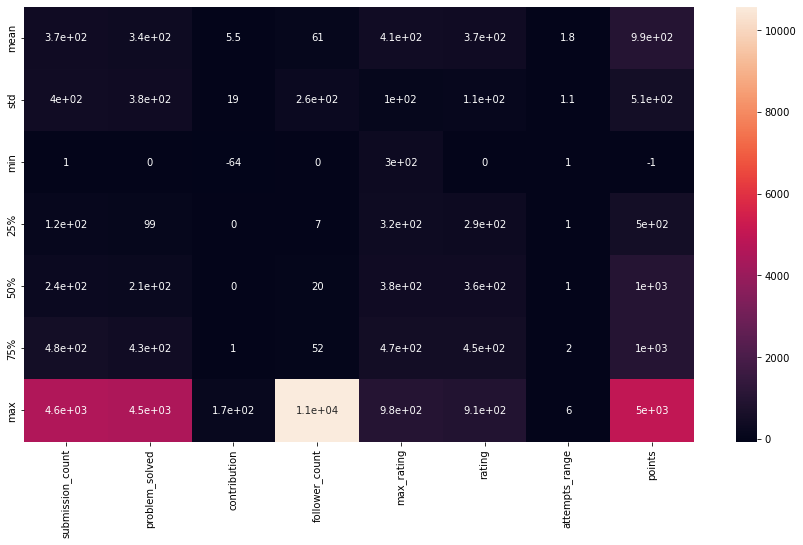

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(df.describe()[1:], annot=True)

<AxesSubplot:>

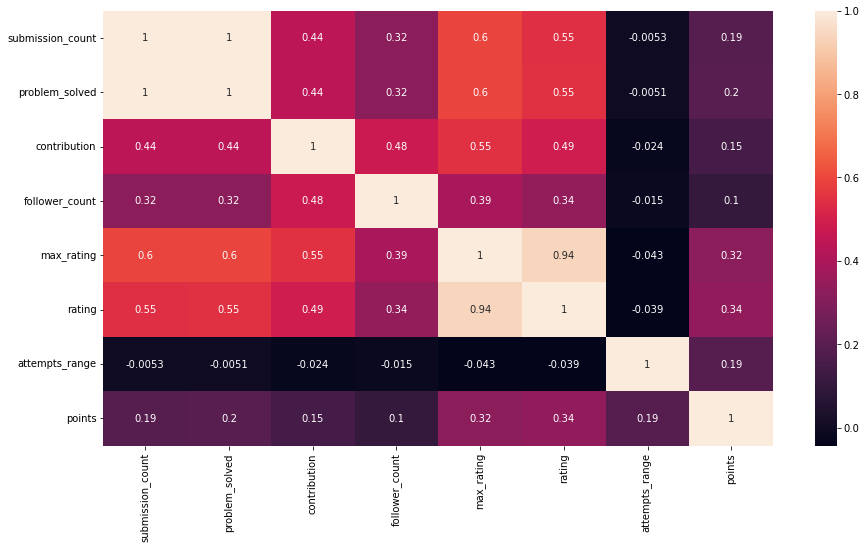

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

In [29]:
def unv(df, group):
    size=len(group)
    plt.figure(figsize=(8*size,5), dpi=140)
    
    for j,i in enumerate(group):
        
        mini= df[i].min()
        maxx= df[i].max()
        rag = df[i].max()-df[i].min()
        mean= df[i].mean()
        median= df[i].median()
        std = df[i].std()
        skew= df[i].skew()
        kurt = df[i].kurtosis()
        
        points= mean-std , mean+std
        
        plt.subplot(1,size, j+1) 
        sns.kdeplot(df[i], shade=True)
        sns.lineplot(points, [0,0], color='black', label='std')
        sns.scatterplot([mini,maxx], [0,0], color='orange', label='min/max')
        sns.scatterplot([mean], [0], color='red', label='mean')
        sns.scatterplot([median], [0], color='yellow', label='median')
        plt.xlabel('{}'.format(i), fontsize=20)
        plt.ylabel('Density')
        plt.title('std= {} Kurtosis = {}; \n skew= {} range= {} \n mean= {} median={}'.format((round(points[0],2), round(points[0],2)),
                                                                                             round(kurt,2),
                                                                                             round(skew,2),
                                                                                             (round(mini,2),round(maxx,2), round(rag,2)),
                                                                                             round(mean,2),
                                                                                             round(median,2)))

In [30]:
int_types=['submission_count','problem_solved','max_rating','rating']
int_types2=['contribution','follower_count','points']

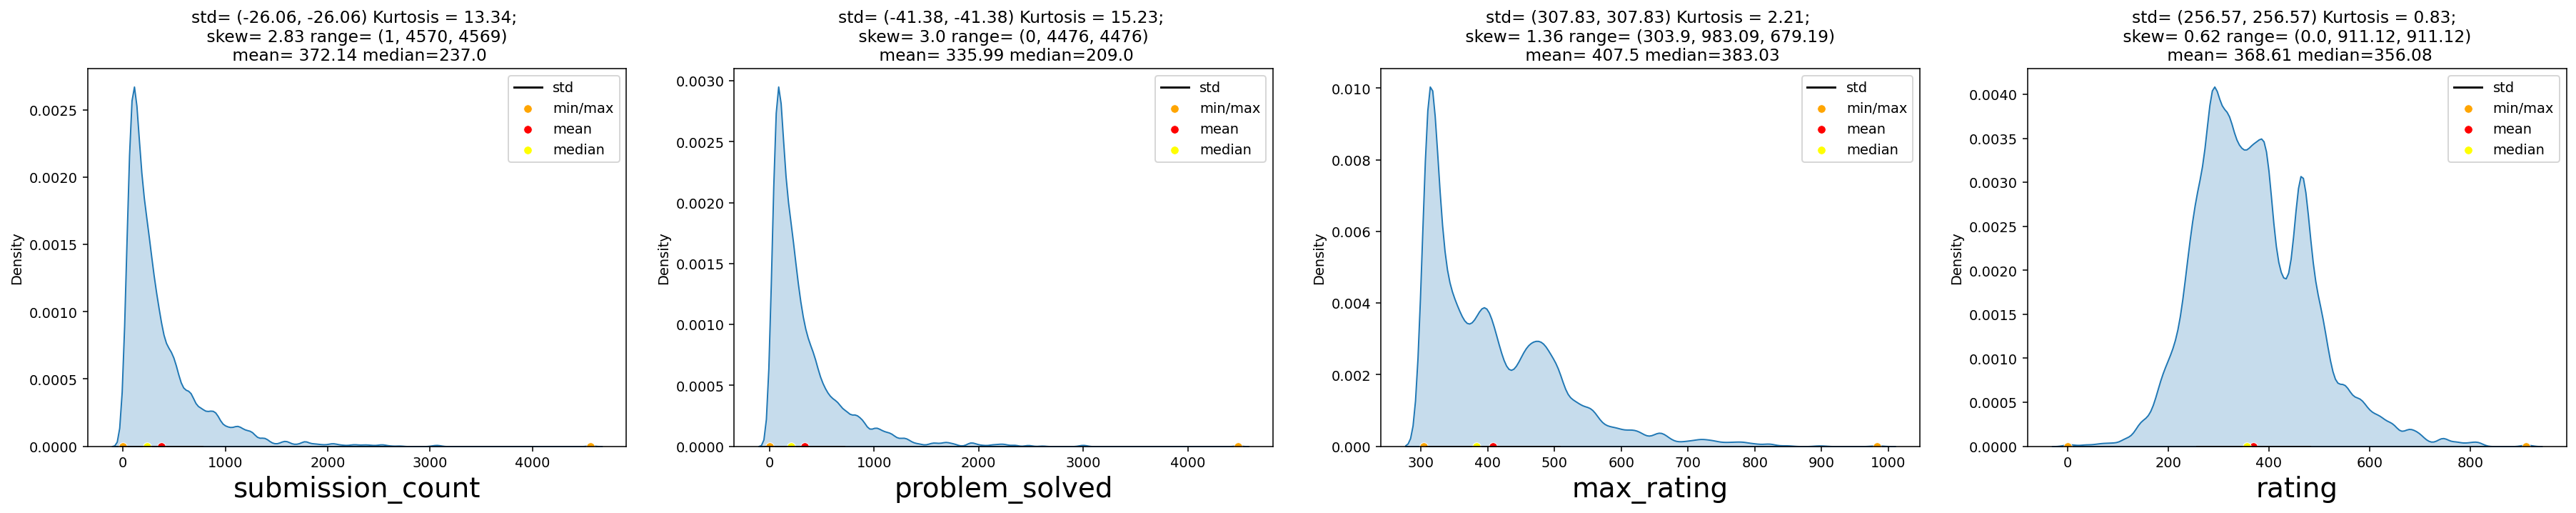

In [31]:
unv(df, int_types)

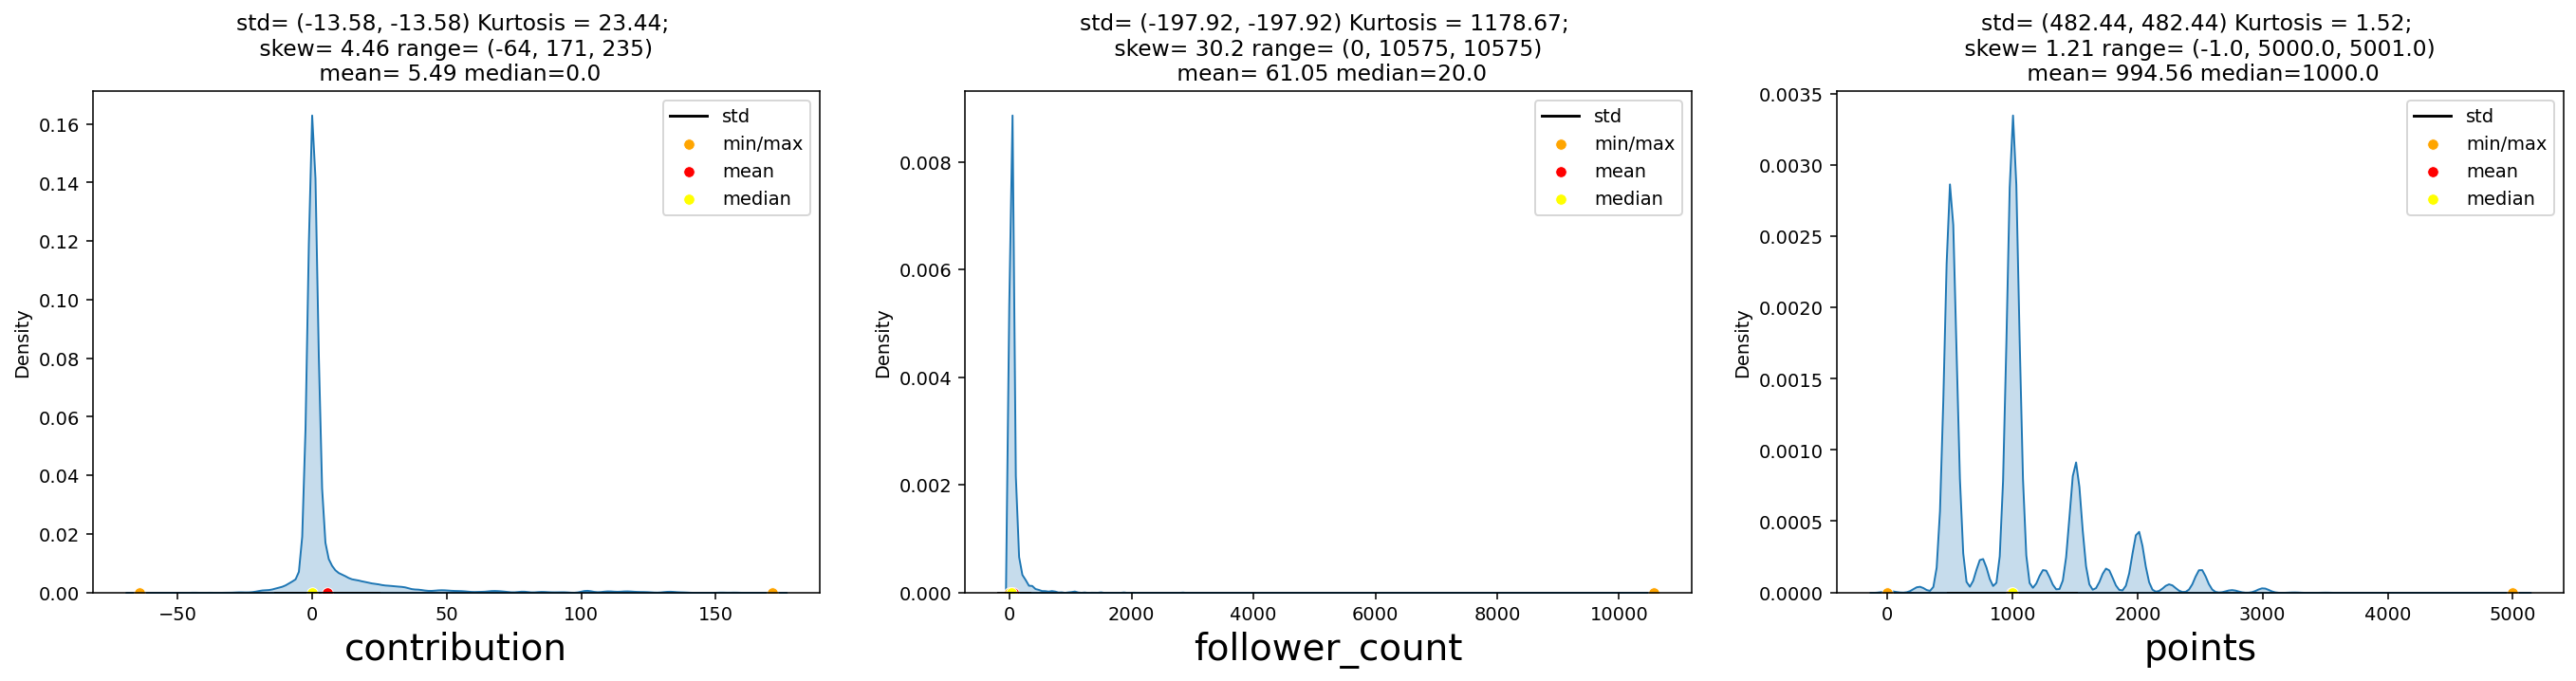

In [32]:
unv(df, int_types2)

In [33]:
def UVA_outlier(df, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = df[i].quantile(0.25)
    quant75 = df[i].quantile(0.75)
    IQR = quant75 - quant25
    med = df[i].median()
    mean = df[i].mean()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(df[i][df[i]>whis_high])
    outlier_low = len(df[i][df[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(df[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n Mean = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   round(mean,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = df[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n Mean = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   round(mean,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

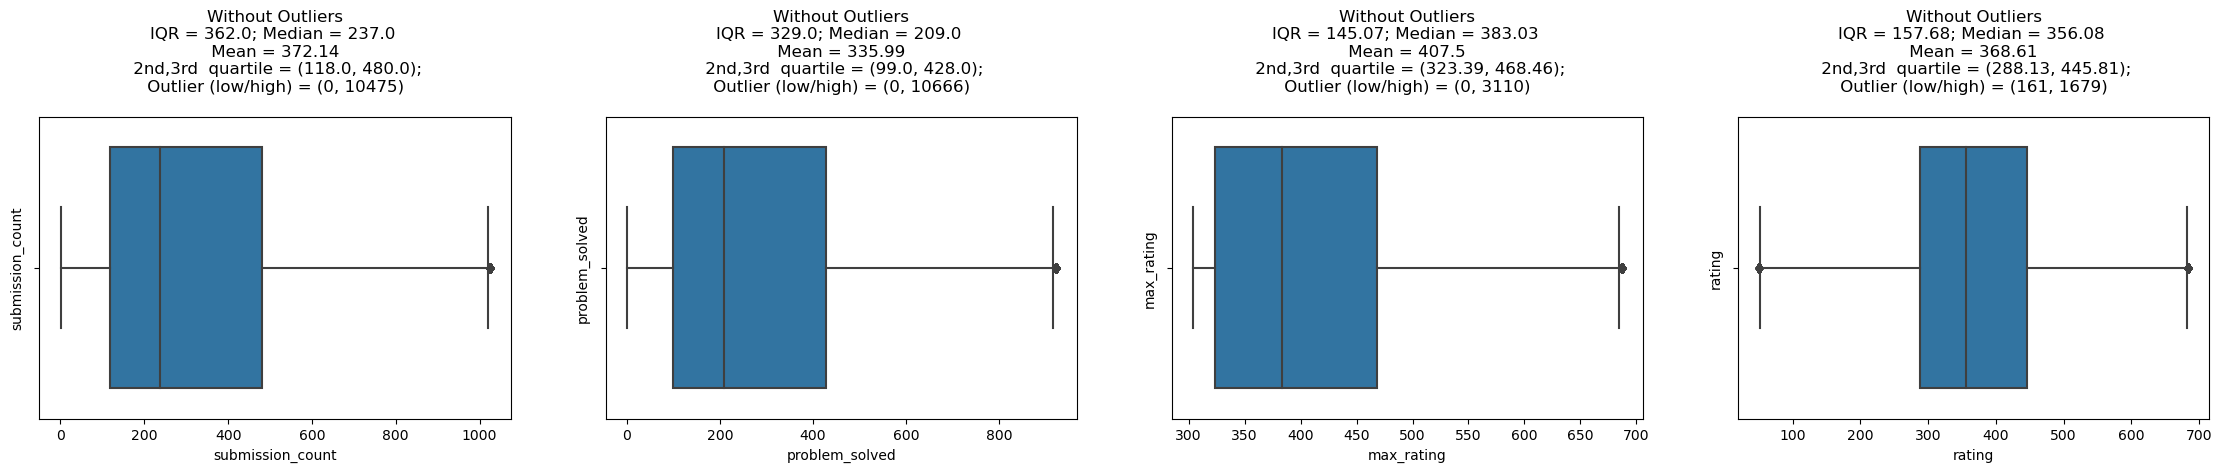

In [34]:
UVA_outlier(df, int_types, include_outlier=False)

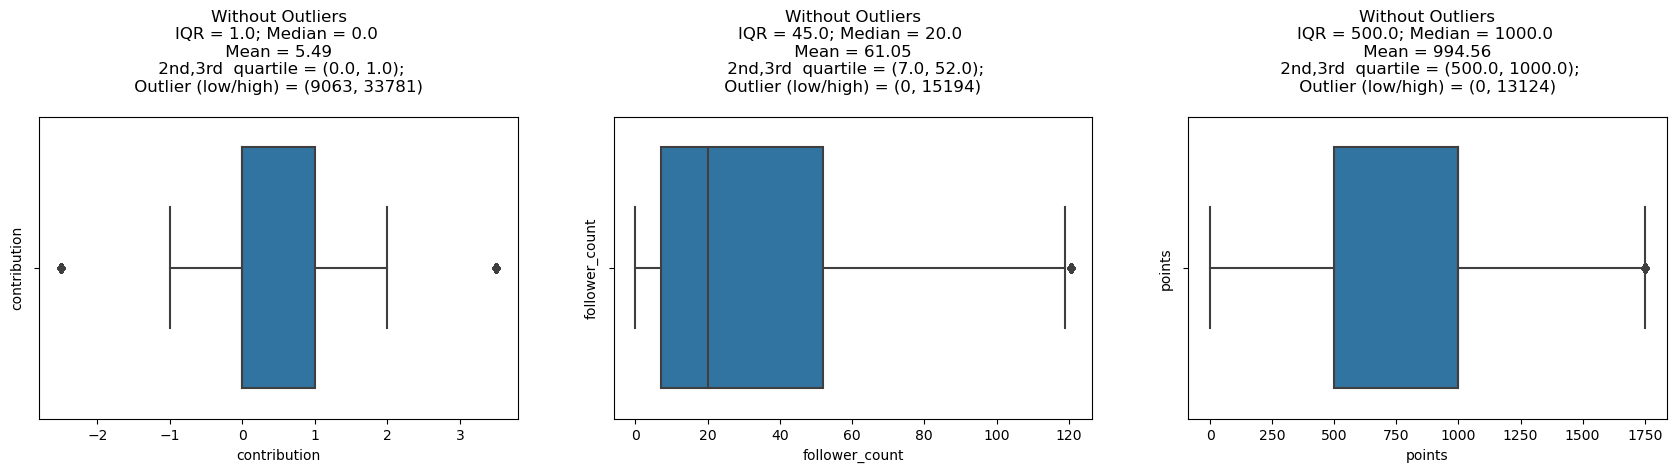

In [35]:
UVA_outlier(df, int_types2, include_outlier=False)

In [36]:
import statsmodels.api as sm 
import scipy.stats as stats
import pylab as py
def normality(df,group):
    size=len(group)
    #plt.figure(figsize=(10*size,8))
    for j,i in enumerate(group):
        plt.figure(figsize=(5*size,5))
        
        plt.subplot(1,2,1)
        sns.kdeplot(df[i])
        plt.subplot(1,2,2)
        stats.probplot(df[i],plot=py)
        plt.show()

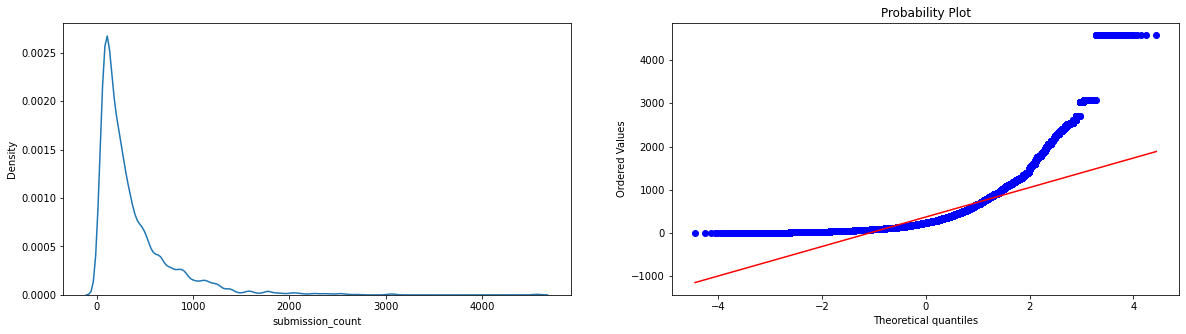

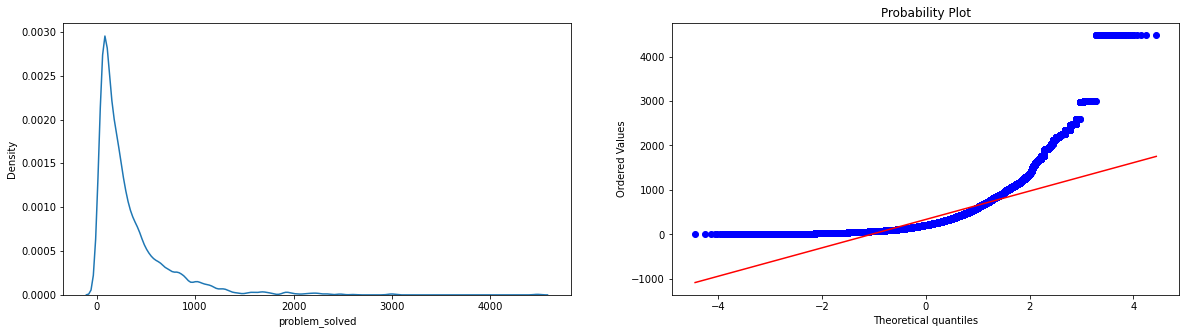

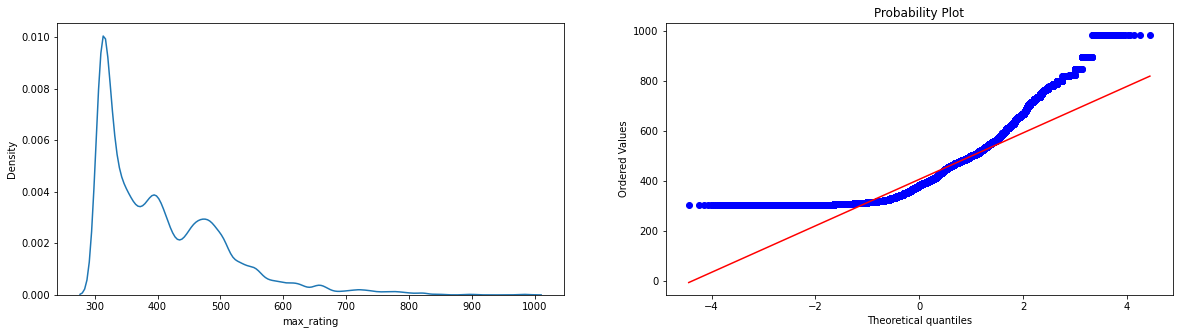

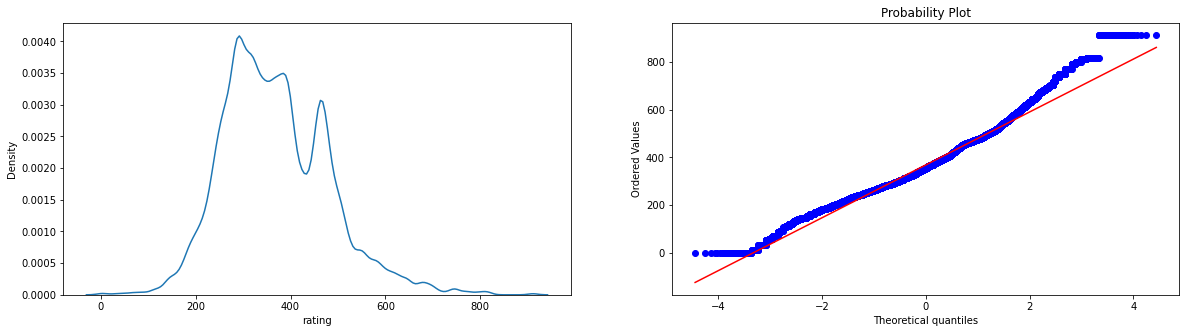

In [37]:
normality(df, int_types)

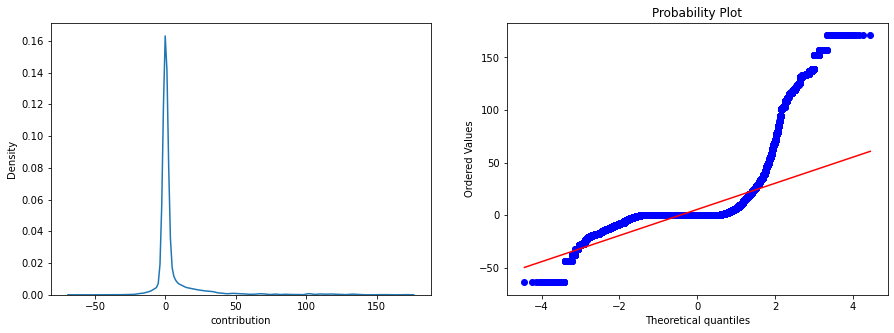

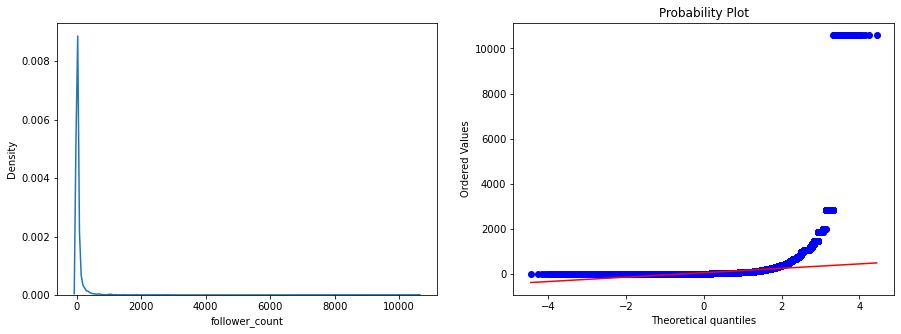

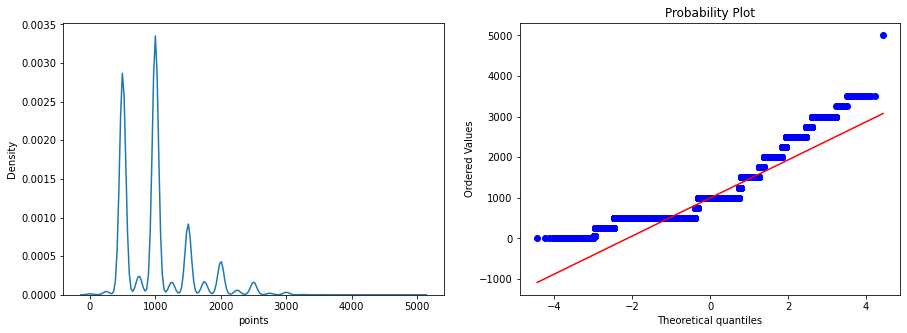

In [38]:
normality(df, int_types2)

In [39]:
df['log_attempt']=np.log(df['attempts_range'])

In [40]:
target=['attempts_range', 'log_attempt']

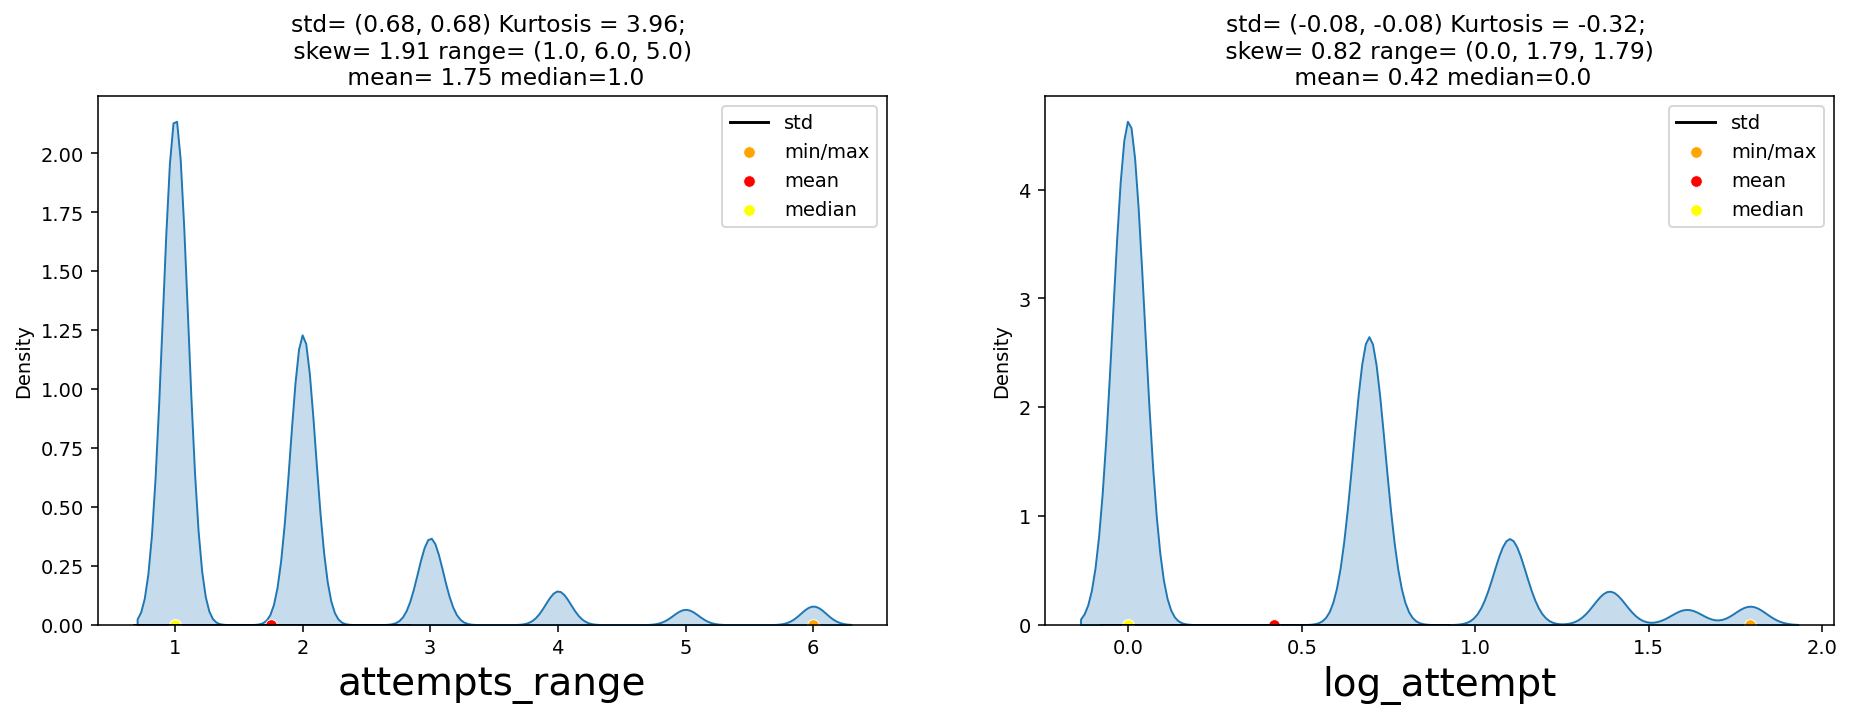

In [41]:
unv(df, target)

In [42]:
df.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,attempts_range,ID,level_type,points,tags,log_attempt
0,user_3311,47,40,0,India,4,1970-01-01 00:00:01.504111645,348.337,330.849,intermediate,1970-01-01 00:00:01.466686436,prob_75,1.0,user_3311_prob_75,A,500.0,implementation,0.0
1,user_3311,47,40,0,India,4,1970-01-01 00:00:01.504111645,348.337,330.849,intermediate,1970-01-01 00:00:01.466686436,prob_1481,1.0,user_3311_prob_1481,B,1000.0,"brute force,implementation",0.0
2,user_3311,47,40,0,India,4,1970-01-01 00:00:01.504111645,348.337,330.849,intermediate,1970-01-01 00:00:01.466686436,prob_3474,1.0,user_3311_prob_3474,B,1000.0,"constructive algorithms,implementation,sortings",0.0
3,user_3311,47,40,0,India,4,1970-01-01 00:00:01.504111645,348.337,330.849,intermediate,1970-01-01 00:00:01.466686436,prob_334,1.0,user_3311_prob_334,A,500.0,"binary search,brute force,implementation,math",0.0
4,user_3311,47,40,0,India,4,1970-01-01 00:00:01.504111645,348.337,330.849,intermediate,1970-01-01 00:00:01.466686436,prob_3508,1.0,user_3311_prob_3508,A,500.0,implementation,0.0


In [43]:
df.pivot_table('attempts_range', ['country', 'rank'], 'level_type', aggfunc='mean')*100

level_type                       A           B           C           D  \
country   rank                                                           
Argentina advanced      170.833333  147.826087  194.117647  184.615385   
          beginner      135.135135  159.090909  280.000000  200.000000   
          intermediate  160.952381  181.012658  205.454545  175.000000   
Armenia   advanced      133.333333  150.000000  160.000000  193.333333   
          beginner      237.500000  328.571429  266.666667  233.333333   
...                            ...         ...         ...         ...   
Venezuela intermediate  127.083333  135.555556  163.888889  200.000000   
Vietnam   advanced      138.538206  162.171053  189.905363  188.888889   
          beginner      160.576923  219.811321  272.916667  259.090909   
          expert        200.000000  183.333333  183.333333  230.000000   
          intermediate  150.248756  168.363636  187.665198  226.785714   

level_type                       E           F           G           H  \
country   rank                                                           
Argentina advanced      200.000000  150.000000  250.000000  100.000000   
          beginner             NaN         NaN         NaN         NaN   
          intermediate  241.176471  128.571429  112.500000  200.000000   
Armenia   advanced      200.000000  466.666667  150.000000         NaN   
          beginner      600.000000         NaN         NaN         NaN   
...                            ...         ...         ...         ...   
Venezuela intermediate  150.000000         NaN         NaN         NaN   
Vietnam   advanced      216.260163  226.153846  200.000000  175.000000   
          beginner      150.000000  100.000000         NaN  450.000000   
          expert        316.666667  100.000000  100.000000  400.000000   
          intermediate  197.727273  256.250000  285.714286  214.285714   

level_type                       I           J           K           L  \
country   rank                                                           
Argentina advanced             NaN  233.333333  300.000000  400.000000   
          beginner             NaN         NaN         NaN         NaN   
          intermediate  160.000000  320.000000  180.000000  125.000000   
Armenia   advanced      100.000000  200.000000  100.000000         NaN   
          beginner      200.000000  200.000000  200.000000         NaN   
...                            ...         ...         ...         ...   
Venezuela intermediate         NaN         NaN         NaN         NaN   
Vietnam   advanced      178.571429  176.000000  185.185185  161.538462   
          beginner             NaN  150.000000  150.000000         NaN   
          expert        100.000000         NaN  100.000000         NaN   
          intermediate  180.000000  175.000000  171.428571  100.000000   

level_type                       M      N  
country   rank                             
Argentina advanced             NaN    NaN  
          beginner             NaN    NaN  
          intermediate         NaN    NaN  
Armenia   advanced      100.000000    NaN  
          beginner             NaN    NaN  
...                            ...    ...  
Venezuela intermediate         NaN    NaN  
Vietnam   advanced      171.428571  200.0  
          beginner             NaN    NaN  
          expert               NaN    NaN  
          intermediate  100.000000  200.0  

[193 rows x 14 columns]

In [44]:
df.columns

Index(['user_id', 'submission_count', 'problem_solved', 'contribution',
       'country', 'follower_count', 'last_online_time_seconds', 'max_rating',
       'rating', 'rank', 'registration_time_seconds', 'problem_id',
       'attempts_range', 'ID', 'level_type', 'points', 'tags', 'log_attempt'],
      dtype='object')

In [52]:
X=df[['submission_count', 'problem_solved', 'country','contribution','follower_count', 'max_rating','rating', 'rank','points']]
y=df['attempts_range']

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label = le.fit_transform(X['country'])
 
# printing label
label
X['country']=label

In [54]:
from sklearn.preprocessing import LabelEncoder
le2=LabelEncoder()
label2 = le.fit_transform(X['rank'])
 
# printing label
label2
X['rank']=label2

In [55]:
X

,submission_count,problem_solved,country,contribution,follower_count,max_rating,rating,rank,points
0,47,40,31,0,4,348.337,330.849,3,500.0
1,47,40,31,0,4,348.337,330.849,3,1000.0
2,47,40,31,0,4,348.337,330.849,3,1000.0
3,47,40,31,0,4,348.337,330.849,3,500.0
4,47,40,31,0,4,348.337,330.849,3,500.0
...,...,...,...,...,...,...,...,...,...
155332,163,115,62,6,40,392.775,288.704,1,1750.0
155333,163,115,62,6,40,392.775,288.704,1,1000.0
155334,163,115,62,6,40,392.775,288.704,1,500.0
155335,163,115,62,6,40,392.775,288.704,1,1000.0


In [56]:
from sklearn.preprocessing import MinMaxScaler
col=X.columns
st=MinMaxScaler()

In [57]:
data=st.fit_transform(X)
X=pd.DataFrame(data, columns=col)
X.head()

,submission_count,problem_solved,country,contribution,follower_count,max_rating,rating,rank,points
0,0.010068,0.008937,0.397436,0.27234,0.000378,0.065428,0.363122,1.0,0.10018
1,0.010068,0.008937,0.397436,0.27234,0.000378,0.065428,0.363122,1.0,0.20016
2,0.010068,0.008937,0.397436,0.27234,0.000378,0.065428,0.363122,1.0,0.20016
3,0.010068,0.008937,0.397436,0.27234,0.000378,0.065428,0.363122,1.0,0.10018
4,0.010068,0.008937,0.397436,0.27234,0.000378,0.065428,0.363122,1.0,0.10018


In [58]:
from sklearn.decomposition import PCA

In [59]:
rat=PCA(n_components=len(X.columns)-1)
rat.fit_transform(X)
exp = rat.explained_variance_ratio_

Text(0.5, 1.0, 'Elbow Plot')

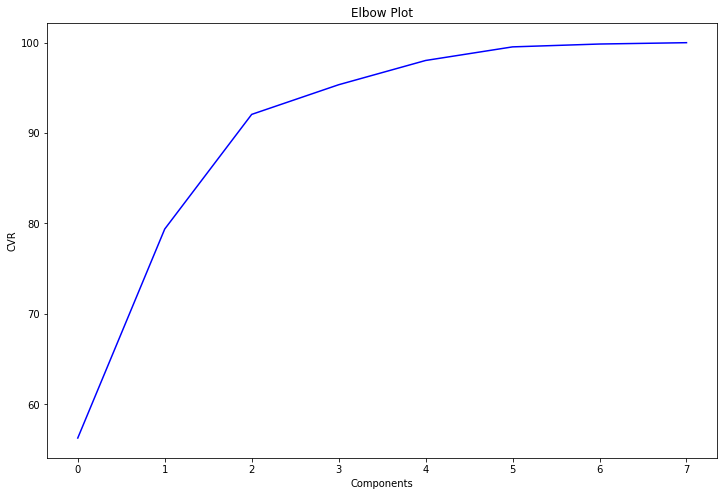

In [60]:
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(exp)*100, color="b")
plt.xlabel("Components")
plt.ylabel("CVR")#Cumulative Variance Ratio
plt.title('Elbow Plot')

In [61]:
rat = PCA(n_components=7) #consider 7 as requried components
data_transform = rat.fit_transform(X)
rat.explained_variance_

array([0.16341026, 0.06710832, 0.03681828, 0.00952048, 0.00779065,
       0.00436696, 0.00091709])

In [62]:
X=data_transform
y=df['attempts_range']

In [63]:
from sklearn.model_selection import train_test_split as tts,  cross_val_score
from sklearn.metrics import f1_score
train1_x, test_x , train1_y, test_y = tts( X, y , test_size = 0.2 , random_state = 50, stratify = y)

In [64]:
train_x, val_x, train_y, val_y = tts(train1_x, train1_y, test_size = 0.2 , random_state = 51, stratify = train1_y)

print('training data    ',train_x.shape,train_y.shape)
print('validation data  ',val_x.shape,val_y.shape)
print('test data        ',test_x.shape,test_y.shape)

training data     (99415, 7) (99415,)
validation data   (24854, 7) (24854,)
test data         (31068, 7) (31068,)


In [65]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [66]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10000)

# Fitting the model
clf.fit(train1_x, train1_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y, average='weighted')
print('Test F1 Score    ', k )

Test F1 Score     0.6956357453240128


In [67]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train1_x, train1_y)
gnb_pred = gnb.predict(test_x)

In [68]:
k = f1_score(gnb_pred, test_y, average='weighted')
print('Test F1 Score    ', k )

Test F1 Score     0.6440268436720246


In [69]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(train1_x, train1_y)
lr_pred = reg.predict(test_x)

In [70]:
k = f1_score(lr_pred, test_y, average='weighted')
print('Test F1 Score    ', k )

Test F1 Score     0.6609672233665864
